## Task: Predict the outcome of a football match, based on historical match and player data.

You are provided with football matches dataset. This dataset includes historical match outcomes, player statistics, and other relevant factors. Your objective is to develop a multiclass classification model that accurately predicts the result of a football match: "home win", "away win", or "draw".

Your target is the column: "Score".

You are provided with the code to download and load the csv file.

Your work will be evaluated based on the completion of the following tasks:

Tasks:
> *  EDA & Preprocessing: You should check the following points and ADD COMMENTS about your findings:
>   
>    1- Imbalance.
>    
>    2- Missing values.
>    
>    3- Duplicates.
>    
>    4- Categorical values.
> * Baseline: Create a majority class baseline.
> * Build a ML model: Train and evaluate using K-Fold (K=5) without shuffling, and with F1 Score as the metric.
> * Plot the features importance of your model.
> * Performance: Achieve F1 Score ≥ 0.5
> * (Bonus): Use "VotingClassifier" from sklearn with parameter voting="soft" to combine more than one model together then print the score (Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html)

Note: You are allowed to use any models or libraries you want.

In [1]:
import gdown
import pandas as pd

url = 'https://drive.google.com/file/d/15R3R4O7CJdtnV8AhIDLYvtNoRtROf6dk/view?usp=sharing'

file_id = url.split('/')[-2]

download_url = f'https://drive.google.com/uc?id={file_id}'

output = 'downloaded_file.csv'
gdown.download(download_url, output, quiet=False)

df = pd.read_csv('downloaded_file.csv')

Downloading...
From: https://drive.google.com/uc?id=15R3R4O7CJdtnV8AhIDLYvtNoRtROf6dk
To: /content/downloaded_file.csv
100%|██████████| 122k/122k [00:00<00:00, 40.9MB/s]


#Import Needed Libraries

In [67]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

#EDA


In [2]:
df.head()

,Season,Home Team,Away Team,Score,Month,Year,WeekOfYear,TotalShotsPerHomeTeam,TotalSoTPerHomeTeam,TotalPassesPerHomeTeam,...,AccurPerHalf1Away,AccurPerHalf2Away,InaccurPerHalf1Away,InaccurPerHalf2Away,AccurPassesPerHalf1Away,AccurPassesPerHalf2Away,ShotsHalf1_diff,ShotsHalf2_diff,SoTHalf1_diff,SoTHalf2_diff
0,1,Antennae,Andromeda,Away win,2,2017,46,8.0,2.0,340.0,...,271.0,162.0,43.0,32.0,0.8633,0.8350,1.0,2.0,0.0,1.0
1,1,Andromeda,Antennae,Draw,9,2016,258,5.0,1.0,443.0,...,174.0,212.0,31.0,45.0,0.8486,0.8247,0.0,-5.0,0.0,1.0
2,1,Andromeda,Butterfly,Away win,12,2016,347,3.0,0.0,669.0,...,185.0,94.0,60.0,49.0,0.7550,0.6570,0.0,-3.0,-1.0,-1.0
3,1,Andromeda,Cigar,Away win,1,2017,25,5.0,2.0,384.0,...,174.0,179.0,46.0,47.0,0.7910,0.7920,-2.0,-4.0,-1.0,0.0
4,1,Andromeda,Circinus,Home Win,8,2016,237,13.0,2.0,542.0,...,237.0,215.0,55.0,59.0,0.8115,0.7847,4.0,4.0,0.0,2.0


In [19]:
df.tail()

,Season,Home Team,Away Team,Score,Month,Year,WeekOfYear,TotalShotsPerHomeTeam,TotalSoTPerHomeTeam,TotalPassesPerHomeTeam,...,AccurPerHalf1Away,AccurPerHalf2Away,InaccurPerHalf1Away,InaccurPerHalf2Away,AccurPassesPerHalf1Away,AccurPassesPerHalf2Away,ShotsHalf1_diff,ShotsHalf2_diff,SoTHalf1_diff,SoTHalf2_diff
407,1,Sculptor,Medusa Merger,Away win,8,2016,241,4.0,0.0,556.0,...,190.0,157.0,40.0,47.0,0.8260,0.7695,-4.0,-2.0,-1.0,-2.0
408,1,Medusa Merger,Sculptor,Home Win,2,2017,50,15.0,5.0,503.0,...,208.0,130.0,36.0,36.0,0.8525,0.7830,4.0,2.0,2.0,2.0
409,1,Medusa Merger,Sombrero,Home Win,10,2016,297,14.0,4.0,437.0,...,115.0,148.0,41.0,42.0,0.7373,0.7790,1.0,1.0,1.0,1.0
410,1,Milky Way,Sculptor,Draw,8,2017,228,14.0,5.0,561.0,...,186.0,149.0,31.0,37.0,0.8570,0.8013,6.0,2.0,1.0,0.0
411,2,Sculptor,Milky Way,Home Win,2,2018,40,12.0,4.0,419.0,...,158.0,127.0,49.0,40.0,0.7630,0.7603,0.0,-1.0,-1.0,1.0


In [20]:
df.sample()

,Season,Home Team,Away Team,Score,Month,Year,WeekOfYear,TotalShotsPerHomeTeam,TotalSoTPerHomeTeam,TotalPassesPerHomeTeam,...,AccurPerHalf1Away,AccurPerHalf2Away,InaccurPerHalf1Away,InaccurPerHalf2Away,AccurPassesPerHalf1Away,AccurPassesPerHalf2Away,ShotsHalf1_diff,ShotsHalf2_diff,SoTHalf1_diff,SoTHalf2_diff
373,2,Milky Way,Comet,Home Win,6,2018,153,8.0,1.0,468.0,...,179.0,199.0,40.0,48.0,0.8174,0.8057,-3.0,3.0,-2.0,1.0


In [4]:
df.shape

(412, 55)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 55 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Season                   412 non-null    int64  
 1   Home Team                412 non-null    object 
 2   Away Team                412 non-null    object 
 3   Score                    412 non-null    object 
 4   Month                    412 non-null    int64  
 5   Year                     412 non-null    int64  
 6   WeekOfYear               412 non-null    int64  
 7   TotalShotsPerHomeTeam    412 non-null    float64
 8   TotalSoTPerHomeTeam      412 non-null    float64
 9   TotalPassesPerHomeTeam   412 non-null    float64
 10  TotalAccurPerHomeTeam    412 non-null    float64
 11  TotalInaccurPerHomeTeam  412 non-null    float64
 12  TotalShotsPerAwayTeam    412 non-null    float64
 13  TotalSoTPerAwayTeam      412 non-null    float64
 14  TotalPassesPerAwayTeam   4

In [6]:
df.columns

Index(['Season', 'Home Team', 'Away Team', 'Score', 'Month', 'Year',
       'WeekOfYear', 'TotalShotsPerHomeTeam', 'TotalSoTPerHomeTeam',
       'TotalPassesPerHomeTeam', 'TotalAccurPerHomeTeam',
       'TotalInaccurPerHomeTeam', 'TotalShotsPerAwayTeam',
       'TotalSoTPerAwayTeam', 'TotalPassesPerAwayTeam',
       'TotalAccurPerAwayTeam', 'TotalInaccurPerAwayTeam',
       'ShotsHomeAway_diff', 'SoTHomeAway_diff', 'TotalShotsPerMatch',
       'TotalSoTPerMatch', 'TotalPassesPerMatch', 'TotalAccurPerMatch',
       'TotalInaccurPerMatch', 'AccurPassesHome', 'AccurPassesAway',
       'AccurPassesMatch', 'ShotsPerHalf1Home', 'ShotsPerHalf2Home',
       'SoTPerHalf1Home', 'SoTPerHalf2Home', 'PassesPerHalf1Home',
       'PassesPerHalf2Home', 'AccurPerHalf1Home', 'AccurPerHalf2Home',
       'InaccurPerHalf1Home', 'InaccurPerHalf2Home', 'AccurPassesPerHalf1Home',
       'AccurPassesPerHalf2Home', 'ShotsPerHalf1Away', 'ShotsPerHalf2Away',
       'SoTPerHalf1Away', 'SoTPerHalf2Away', 'PassesPer

In [7]:
df.describe()

,Season,Month,Year,WeekOfYear,TotalShotsPerHomeTeam,TotalSoTPerHomeTeam,TotalPassesPerHomeTeam,TotalAccurPerHomeTeam,TotalInaccurPerHomeTeam,TotalShotsPerAwayTeam,...,AccurPerHalf1Away,AccurPerHalf2Away,InaccurPerHalf1Away,InaccurPerHalf2Away,AccurPassesPerHalf1Away,AccurPassesPerHalf2Away,ShotsHalf1_diff,ShotsHalf2_diff,SoTHalf1_diff,SoTHalf2_diff
count,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,...,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000
mean,1.497573,6.087379,2017.118932,169.815534,10.876214,2.890777,465.813107,378.121359,87.691748,10.026699,...,187.580097,173.533981,42.429612,44.703883,0.805866,0.782067,0.720874,0.128641,0.131068,0.009709
std,0.500602,3.892364,0.778626,119.949523,4.445038,1.812423,105.932203,102.283609,13.632994,3.935213,...,56.013475,56.364657,7.647171,8.593252,0.053117,0.065867,3.746499,4.637775,1.697947,1.954445
min,1.000000,1.000000,2016.000000,2.000000,0.000000,0.000000,228.000000,151.000000,50.000000,1.000000,...,81.000000,55.000000,25.000000,24.000000,0.627000,0.565400,-12.000000,-15.000000,-6.000000,-7.000000
25%,1.000000,2.000000,2016.750000,50.750000,8.000000,2.000000,390.500000,306.750000,79.000000,7.000000,...,147.000000,131.000000,37.000000,39.000000,0.767900,0.740525,-2.000000,-3.000000,-1.000000,-1.000000
50%,1.000000,6.000000,2017.000000,153.000000,11.000000,3.000000,459.000000,370.000000,86.000000,10.000000,...,180.000000,171.000000,41.000000,44.000000,0.812000,0.794700,1.000000,0.000000,0.000000,0.000000
75%,2.000000,10.000000,2018.000000,275.250000,14.000000,4.000000,528.000000,441.250000,96.000000,12.000000,...,222.000000,212.250000,47.000000,50.000000,0.842475,0.832125,3.000000,3.000000,1.000000,1.000000
max,2.000000,12.000000,2018.000000,357.000000,32.000000,10.000000,896.000000,750.000000,146.000000,28.000000,...,398.000000,348.000000,82.000000,84.000000,0.914000,0.900400,13.000000,15.000000,5.000000,7.000000


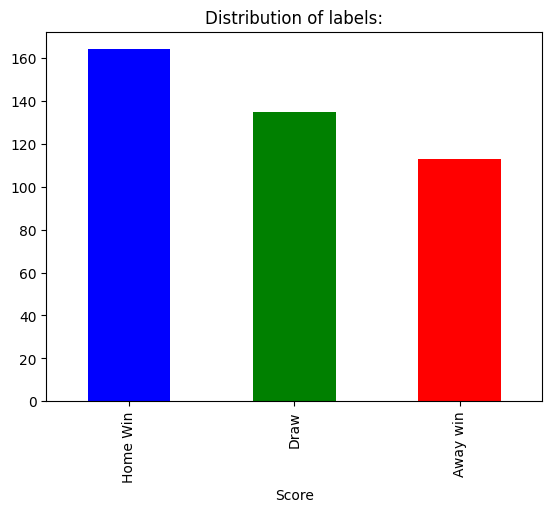

In [39]:
df["Score"].value_counts().plot(kind="bar" , color=["blue","green","red"])
plt.title("Distribution of labels:")
plt.show()

## Check Missing Values

In [9]:
#here to check missing value
df.isnull().sum()

,0
Season,0
Home Team,0
Away Team,0
Score,0
Month,0
Year,0
WeekOfYear,0
TotalShotsPerHomeTeam,0
TotalSoTPerHomeTeam,0
TotalPassesPerHomeTeam,0


# Duplicates

now to check duplicate value

In [17]:
duplicates = df.duplicated().sum()

In [18]:
print(f"Number of Duplicate Samples: {duplicates}")
if duplicates > 0:
     print("Dropping Duplicates...")
     df.drop_duplicates(inplace=True)
     print("Duplicates Dropped.")
else:
     print("No Duplicate Samples Found.")

Number of Duplicate Samples: 0
No Duplicate Samples Found.


# Drop columns we dont need it

In [25]:
df.drop('ShotsHomeAway_diff',axis=1,inplace=True)

In [26]:
df.drop('SoTHomeAway_diff',axis=1,inplace=True)

In [27]:
df.drop('ShotsPerHalf1Home',axis=1,inplace=True)

In [28]:
df.drop('ShotsPerHalf2Home',axis=1,inplace=True)

In [29]:
df.drop('SoTPerHalf1Home',axis=1,inplace=True)

In [30]:
df.drop('SoTPerHalf2Home',axis=1,inplace=True)

In [31]:
df.drop('AccurPerHalf1Home',axis=1,inplace=True)

In [32]:
df.drop('AccurPerHalf2Home',axis=1,inplace=True)

In [33]:
df.drop('InaccurPerHalf1Home',axis=1,inplace=True)

In [34]:
df.drop('InaccurPerHalf2Home',axis=1,inplace=True)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Season                   412 non-null    int64  
 1   Home Team                412 non-null    object 
 2   Away Team                412 non-null    object 
 3   Score                    412 non-null    object 
 4   Month                    412 non-null    int64  
 5   Year                     412 non-null    int64  
 6   WeekOfYear               412 non-null    int64  
 7   TotalShotsPerHomeTeam    412 non-null    float64
 8   TotalSoTPerHomeTeam      412 non-null    float64
 9   TotalPassesPerHomeTeam   412 non-null    float64
 10  TotalAccurPerHomeTeam    412 non-null    float64
 11  TotalInaccurPerHomeTeam  412 non-null    float64
 12  TotalShotsPerAwayTeam    412 non-null    float64
 13  TotalSoTPerAwayTeam      412 non-null    float64
 14  TotalPassesPerAwayTeam   4

In [23]:
#df.drop('',axis=1,inplace=True)
df = df.drop(columns=['ShotsHomeAway_diff', 'SoTHomeAway_diff'،'ShotsPerHalf1Home','ShotsPerHalf2Home','SoTPerHalf1Home','SoTPerHalf2Home','AccurPerHalf1Home','AccurPerHalf2Home','InaccurPerHalf1Home','InaccurPerHalf2Home'])

SyntaxError: invalid character '،' (U+060C) (<ipython-input-23-a66ea74cf2d3>, line 1)

now we need to convert target column to numricall

In [22]:
# Do we have categorical columns
categorical_cols = df.select_dtypes(include=["object"]).columns
print("Categorical Columns:", list(categorical_cols))

Categorical Columns: ['Home Team', 'Away Team', 'Score']


In [21]:
df["Score"].unique()

array(['Away win', 'Draw', 'Home Win'], dtype=object)

In [43]:
label_encoder = LabelEncoder()
df["Score"] = label_encoder.fit_transform(df["Score"])
print(df["Score"].unique())

[0 1 2]


In [40]:
df["Home Team"].unique()

array(['Antennae', 'Andromeda', 'Butterfly', 'Cartwheel', 'Sculptor',
       'Cigar', 'Comet', 'Cosmos Redshift 7', 'Eye of Sauron',
       'Medusa Merger', 'Milky Way', 'Sunflower', 'Tadpole', 'Fireworks',
       'Backward', 'Circinus', 'Coma Pinwheel', 'Sombrero', 'Triangulum'],
      dtype=object)

In [41]:
df["Away Team"].unique()

array(['Andromeda', 'Antennae', 'Butterfly', 'Cigar', 'Circinus',
       'Cartwheel', 'Coma Pinwheel', 'Comet', 'Cosmos Redshift 7',
       'Fireworks', 'Medusa Merger', 'Milky Way', 'Backward', 'Sculptor',
       'Sunflower', 'Triangulum', 'Eye of Sauron', 'Tadpole', 'Sombrero'],
      dtype=object)

In [55]:
df.drop('Home Team',axis=1,inplace=True)

In [56]:
df.drop('Away Team',axis=1,inplace=True)

In [44]:
pd.get_dummies(df, columns=['Home Team',"Away Team"], drop_first=True)

,Season,Score,Month,Year,WeekOfYear,TotalShotsPerHomeTeam,TotalSoTPerHomeTeam,TotalPassesPerHomeTeam,TotalAccurPerHomeTeam,TotalInaccurPerHomeTeam,...,Away Team_Cosmos Redshift 7,Away Team_Eye of Sauron,Away Team_Fireworks,Away Team_Medusa Merger,Away Team_Milky Way,Away Team_Sculptor,Away Team_Sombrero,Away Team_Sunflower,Away Team_Tadpole,Away Team_Triangulum
0,1,0,2,2017,46,8.0,2.0,340.0,265.0,75.0,...,False,False,False,False,False,False,False,False,False,False
1,1,1,9,2016,258,5.0,1.0,443.0,354.0,89.0,...,False,False,False,False,False,False,False,False,False,False
2,1,0,12,2016,347,3.0,0.0,669.0,554.0,115.0,...,False,False,False,False,False,False,False,False,False,False
3,1,0,1,2017,25,5.0,2.0,384.0,281.0,103.0,...,False,False,False,False,False,False,False,False,False,False
4,1,2,8,2016,237,13.0,2.0,542.0,436.0,106.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,1,0,8,2016,241,4.0,0.0,556.0,447.0,109.0,...,False,False,False,True,False,False,False,False,False,False
408,1,2,2,2017,50,15.0,5.0,503.0,413.0,90.0,...,False,False,False,False,False,True,False,False,False,False
409,1,2,10,2016,297,14.0,4.0,437.0,365.0,72.0,...,False,False,False,False,False,False,True,False,False,False
410,1,1,8,2017,228,14.0,5.0,561.0,475.0,86.0,...,False,False,False,False,False,True,False,False,False,False


In [46]:
df.head()

,Season,Home Team,Away Team,Score,Month,Year,WeekOfYear,TotalShotsPerHomeTeam,TotalSoTPerHomeTeam,TotalPassesPerHomeTeam,...,AccurPerHalf1Away,AccurPerHalf2Away,InaccurPerHalf1Away,InaccurPerHalf2Away,AccurPassesPerHalf1Away,AccurPassesPerHalf2Away,ShotsHalf1_diff,ShotsHalf2_diff,SoTHalf1_diff,SoTHalf2_diff
0,1,Antennae,Andromeda,0,2,2017,46,8.0,2.0,340.0,...,271.0,162.0,43.0,32.0,0.8633,0.8350,1.0,2.0,0.0,1.0
1,1,Andromeda,Antennae,1,9,2016,258,5.0,1.0,443.0,...,174.0,212.0,31.0,45.0,0.8486,0.8247,0.0,-5.0,0.0,1.0
2,1,Andromeda,Butterfly,0,12,2016,347,3.0,0.0,669.0,...,185.0,94.0,60.0,49.0,0.7550,0.6570,0.0,-3.0,-1.0,-1.0
3,1,Andromeda,Cigar,0,1,2017,25,5.0,2.0,384.0,...,174.0,179.0,46.0,47.0,0.7910,0.7920,-2.0,-4.0,-1.0,0.0
4,1,Andromeda,Circinus,2,8,2016,237,13.0,2.0,542.0,...,237.0,215.0,55.0,59.0,0.8115,0.7847,4.0,4.0,0.0,2.0


#Feature Engineering

#Standard Scaler

In [47]:
scaler = StandardScaler()
numerical_columns = ['WeekOfYear', 'TotalPassesPerHomeTeam','TotalAccurPerHomeTeam',"TotalInaccurPerHomeTeam","AccurPerHalf1Away","AccurPerHalf2Away","InaccurPerHalf1Away","InaccurPerHalf2Away"]  # Replace with your column names
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
print(df.head())

   Season  Home Team  Away Team  Score  Month  Year  WeekOfYear  \
0       1   Antennae  Andromeda      0      2  2017   -1.033485   
1       1  Andromeda   Antennae      1      9  2016    0.736074   
2       1  Andromeda  Butterfly      0     12  2016    1.478955   
3       1  Andromeda      Cigar      0      1  2017   -1.208772   
4       1  Andromeda   Circinus      2      8  2016    0.560787   

   TotalShotsPerHomeTeam  TotalSoTPerHomeTeam  TotalPassesPerHomeTeam  ...  \
0                    8.0                  2.0               -1.189120  ...   
1                    5.0                  1.0               -0.215618  ...   
2                    3.0                  0.0                1.920416  ...   
3                    5.0                  2.0               -0.773255  ...   
4                   13.0                  2.0                0.720079  ...   

   AccurPerHalf1Away  AccurPerHalf2Away  InaccurPerHalf1Away  \
0           1.491093          -0.204880             0.074679   


# Dataset split

In [57]:
X = df.drop("Score",axis=1)
y = df['Score']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Logistic Regression

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Season                   412 non-null    int64  
 1   Score                    412 non-null    int64  
 2   Month                    412 non-null    int64  
 3   Year                     412 non-null    int64  
 4   WeekOfYear               412 non-null    float64
 5   TotalShotsPerHomeTeam    412 non-null    float64
 6   TotalSoTPerHomeTeam      412 non-null    float64
 7   TotalPassesPerHomeTeam   412 non-null    float64
 8   TotalAccurPerHomeTeam    412 non-null    float64
 9   TotalInaccurPerHomeTeam  412 non-null    float64
 10  TotalShotsPerAwayTeam    412 non-null    float64
 11  TotalSoTPerAwayTeam      412 non-null    float64
 12  TotalPassesPerAwayTeam   412 non-null    float64
 13  TotalAccurPerAwayTeam    412 non-null    float64
 14  TotalInaccurPerAwayTeam  4

#bulid model

In [59]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [60]:
y_pred_train = logistic_model.predict(x_train)
y_pred_test = logistic_model.predict(x_test)

In [65]:
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Train Accuracy: 0.5938
Test Accuracy: 0.4919


In [68]:
conf_matrix = confusion_matrix(y_test, y_pred_test)
class_report = classification_report(y_test, y_pred_test)

print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Confusion Matrix:
[[19  3 10]
 [13 11 19]
 [ 7 11 31]]

Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.59      0.54        32
           1       0.44      0.26      0.32        43
           2       0.52      0.63      0.57        49

    accuracy                           0.49       124
   macro avg       0.48      0.49      0.48       124
weighted avg       0.48      0.49      0.48       124



Good luck in the exam x)

Prepared by: Mohamed Eltayeb
